In [313]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.font_manager as fm
from pylab import plot, show

import re

In [451]:
galac = pd.read_csv("C:\L1K4\리뷰크롤링전처리팀\형태소처리전데이터\\galac.csv", header=0, index_col=0)
hyalu = pd.read_csv("C:\L1K4\리뷰크롤링전처리팀\형태소처리전데이터\\hyalu.csv", header=0, index_col=0)
mugwart = pd.read_csv("C:\L1K4\리뷰크롤링전처리팀\형태소처리전데이터\\mugwart.csv", header=0, index_col=0)
niasin = pd.read_csv("C:\L1K4\리뷰크롤링전처리팀\형태소처리전데이터\\niasin.csv", header=0, index_col=0)
propol = pd.read_csv("C:\L1K4\리뷰크롤링전처리팀\형태소처리전데이터\\propol.csv", header=0, index_col=0)

# 불용어 제거

---
### 갈락토미세스

In [3]:
galac["review"]

0        #사전체험단 일단 새롭게 바뀐 씨드세럼 너무 좋습니다!! 기존 씨드세럼하고 확실히 ...
1        #사전체험단 업그레이드 되어 돌아왔음. 1. 뚜껑의 변화 대만족!!! 플라스틱 뚜껑...
2        최근 속당김도 심하고 코 주변 살이 자주 터서 유분기 많은 크림을 발라야만 얼굴이 ...
3        #사전체험단 체험단 신청해서 사용해보게됐어요^^ 받아왔는데 샘플 크기가 꽤 커서 놀...
4        #사전체험단 그린티 씨드 세럼이 새로 리뉴얼 됐다는 소식 듣고 얼른 신청해보았습니다...
                               ...                        
10177    #사전체험단 그린티 씨드 세럼 정말 7년째 써오고 있는 사람입니다. 일단 항상 세안...
10178    #사전체험단 초초 지성이고 볼은 언제나 홍조낀 붉은녀자입니다.ㅋㅋ 신제품 그린티씨드...
10179    #사전체험단 일단 속당김이 없고 피부에 잘 맞아서 좋아요! 씨드세럼 세통 정도 썼었...
10180    #사전체험단 1. 향 : 기존대비 산뜻하고 맑아진 느낌이에요! 비온 뒤 맑은 날, ...
10181    #사전체험단 - 향 : ★★★★☆ : 구)형 비교 산뜻해졌고 무향도 좋을 것 같음 ...
Name: review, Length: 10182, dtype: object

In [4]:
text=''
review_nomal=[]
for each_line in galac["review"]:
    review_nomal.append(each_line)

In [7]:
review_nomal[1]

'#사전체험단 업그레이드 되어 돌아왔음. 1. 뚜껑의 변화 대만족!!! 플라스틱 뚜껑이 사라지고, 펌프를 직접 돌려쓸 수 있게 되어 환경에도 착하고, 굉장히 편해졌다. 기존 플러스틱 뚜껑은 한번 잃어버리면 손깃만 스쳐도 세럼이 눌러질까 불편했었다. 2. 촉촉함하면 그린티 씨드 세럼이다. 한번만 써본 사람은 없을 것이다. 재구매율이 굉장히 높을 듯. 나역시 몇통을 썼는지 세본적은 없지만, 내 구매 수치를 캡쳐할 수 있다면 꼭 첨부하고 싶을 정도. 속건조에 촉촉함을 더해줌. 3. 진정효과! 마스크 쓰는 시국에 진정이 제일 중요한 법'

In [9]:
def clean_str(text):
    pattern = '([ㄱ-ㅎ-ㅏ-ㅣ]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[^\w\s]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[사전체험단]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[a-zA-Z]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[0-9.]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "'[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]"
    text = re.sub(pattern=pattern, repl='', string=text)
    
    return text

review_galac=[]
for i in review_nomal:
    a=clean_str(i)
    review_galac.append(a)

In [12]:
review_nomal[0]

'#사전체험단 일단 새롭게 바뀐 씨드세럼 너무 좋습니다!! 기존 씨드세럼하고 확실히 차이가 있어요. 기존 씨드세럼이 조금 더 묽은느낌이 있고 새로 나온 세럼이 좀더 쫀쫀한 젤에 가까운 제형이에요. 향도 다릅니다. 기존 세럼이 그린티의 정석향이라면 바뀐 세럼은 그린티향이 확 줄고 스킨케어에서 날 법한 은은한 향이 나서 향에 민감한 사람도 잘 사용할 수 있을 것 같아요. 기존 세럼도 흡수력이 좋았지만 브포세럼이나 자연발효에센스만큼은 아니였거든요. 그런데 바뀐 세럼은 흡수력이 더 좋아져서 놀랐어요. 다만 기존세럼이 레이어링이 쉬웠다면 바뀐세럼은 조금은 텀을 주고 레이어링하는게 더 나은 것 같아요.'

In [11]:
review_galac[0]

' 일 새롭게 바뀐 씨드세럼 너무 좋습니다 기존 씨드세럼하고 확실히 차이가 있어요 기존 씨드세럼이 조금 더 묽은느낌이 있고 새로 나온 세럼이 좀더 쫀쫀한 젤에 가까운 제형이에요 향도 다릅니다 기존 세럼이 그린티의 정석향이라면 바뀐 세럼은 그린티향이 확 줄고 스킨케어에서 날 법한 은은한 향이 나서 향에 민감한 람도 잘 용할 수 있을 것 같아요 기존 세럼도 흡수력이 좋았지만 브포세럼이나 자연발효에센스만큼은 아니였거든요 그런데 바뀐 세럼은 흡수력이 더 좋아져서 놀랐어요 다만 기존세럼이 레이어링이 쉬웠다면 바뀐세럼은 조금은 텀을 주고 레이어링하는게 더 나은 것 같아요'

In [173]:
import nltk
from konlpy.tag import Okt
Okt=Okt()

In [14]:
a=len(review_galac)
token_review_galac_list = []

for i in range(0, a):
    token_review = Okt.morphs(review_galac[i]) #Okt= 형태소 분석기, morphs형태소 추출, review_galac= 전처리한 리뷰
    token_review_galac_list.append(token_review)

In [61]:
galac["token_review"] = token_review_galac_list

In [62]:
galac.to_csv("galac_token.csv", encoding="utf-8-sig")

In [63]:
galac

,review,point,date,ingre,token_review
0,#사전체험단 일단 새롭게 바뀐 씨드세럼 너무 좋습니다!! 기존 씨드세럼하고 확실히 ...,5,2021-03-02 00:00:00,갈락토미세스,"[일, 새롭게, 바뀐, 씨드, 세럼, 너무, 좋습니다, 기존, 씨드, 세럼, 하고,..."
1,#사전체험단 업그레이드 되어 돌아왔음. 1. 뚜껑의 변화 대만족!!! 플라스틱 뚜껑...,5,2021-03-02 00:00:00,갈락토미세스,"[업그레이드, 되어, 돌아왔음, 뚜껑, 의, 변화, 대, 만족, 플라스틱, 뚜껑, ..."
2,최근 속당김도 심하고 코 주변 살이 자주 터서 유분기 많은 크림을 발라야만 얼굴이 ...,5,2021-03-02 00:00:00,갈락토미세스,"[최근, 속, 당, 김, 도, 심하고, 코, 주변, 살이, 자주, 터, 서, 유, ..."
3,#사전체험단 체험단 신청해서 사용해보게됐어요^^ 받아왔는데 샘플 크기가 꽤 커서 놀...,5,2021-03-02 00:00:00,갈락토미세스,"[신청, 해서, 용, 해보게, 됐어요, 받아, 왔는데, 샘플, 크기, 가, 꽤, 커..."
4,#사전체험단 그린티 씨드 세럼이 새로 리뉴얼 됐다는 소식 듣고 얼른 신청해보았습니다...,5,2021-03-02 00:00:00,갈락토미세스,"[그린티, 씨드, 세, 럼, 이, 새로, 리뉴얼, 됐다는, 소식, 듣고, 얼른, 신..."
...,...,...,...,...,...
10177,#사전체험단 그린티 씨드 세럼 정말 7년째 써오고 있는 사람입니다. 일단 항상 세안...,5,2021-02-18 00:00:00,갈락토미세스,"[그린티, 씨드, 세, 럼, 정말, 년, 째, 써오고, 있는, 람, 입니다, 일, ..."
10178,#사전체험단 초초 지성이고 볼은 언제나 홍조낀 붉은녀자입니다.ㅋㅋ 신제품 그린티씨드...,5,2021-02-18 00:00:00,갈락토미세스,"[초초, 지성, 이고, 볼, 은, 언제나, 홍조, 낀, 붉은, 녀자, 입니다, 신제..."
10179,#사전체험단 일단 속당김이 없고 피부에 잘 맞아서 좋아요! 씨드세럼 세통 정도 썼었...,5,2021-02-18 00:00:00,갈락토미세스,"[일, 속, 당, 김, 이, 없고, 피부, 에, 잘, 맞아서, 좋아요, 씨드, 세럼..."
10180,"#사전체험단 1. 향 : 기존대비 산뜻하고 맑아진 느낌이에요! 비온 뒤 맑은 날, ...",5,2021-02-18 00:00:00,갈락토미세스,"[향, 기존, 대비, 산뜻하고, 맑아진, 느낌, 이에요, 비온, 뒤, 맑은, 날, ..."


---
### 히알루론산

In [121]:
hyalu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14254 entries, 0 to 14253
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        14254 non-null  object
 1   point         14254 non-null  int64 
 2   date          14254 non-null  object
 3   ingre         14254 non-null  object
 4   token_review  14254 non-null  object
dtypes: int64(1), object(4)
memory usage: 668.2+ KB


In [95]:
text=''
review_hyal_nomal=[]
for each_line in hyalu["review"]:
    review_hyal_nomal.append(each_line)

In [96]:
review_hyal_nomal[0]

'트루케어 에이씨 진정 앰플 일단 트루케어 비타민 씨 20 앰플 쓰면서 따끔하고 약간 얼굴에 자극이 되어서 비타민 바르고 진정용으로 바르긴 하는데요... 너무 물 재질이라 그런지 ㅜㅜ 몇번쓰면 순삭입니다 아주아주 가볍습니다'

In [101]:
def clean_str(text):
    pattern = '([ㄱ-ㅎ-ㅏ-ㅣ]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[^\w\s]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[사전체험단]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[a-zA-Z]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[0-9.]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "'[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]"
    text = re.sub(pattern=pattern, repl='', string=text)
    
    return text

review_hyal=[]
for i in review_hyal_nomal:
    a=clean_str(i)
    review_hyal.append(a)

In [102]:
a=len(review_hyal)
token_review_hyal_list = []

for i in range(0, a):
    token_review = Okt.morphs(review_hyal[i]) #Okt= 형태소 분석기, morphs형태소 추출, review_*= 전처리한 리뷰
    token_review_hyal_list.append(token_review)

In [103]:
review_hyal_nomal[0]

'트루케어 에이씨 진정 앰플 일단 트루케어 비타민 씨 20 앰플 쓰면서 따끔하고 약간 얼굴에 자극이 되어서 비타민 바르고 진정용으로 바르긴 하는데요... 너무 물 재질이라 그런지 ㅜㅜ 몇번쓰면 순삭입니다 아주아주 가볍습니다'

'트러블 생겼을때 투루케어 진정앰플 바르고 자면 다음날 좀 진정이 돼는것같아요 저한테 잘맞는거같아 요즘은 아침 저녁 계속 용중이에요 자주 써서 금방 줄어드네요 대용량으로 나왔음 좋겠습니다'

In [105]:
hyalu["token_review"] = token_review_hyal_list

In [106]:
hyalu.head()

,review,point,date,ingre,token_review
0,트루케어 에이씨 진정 앰플 일단 트루케어 비타민 씨 20 앰플 쓰면서 따끔하고 약간...,4,2021-03-01,히알루론산,"[트루, 케어, 에이, 씨, 진정, 앰플, 일, 트루, 케어, 비타민, 씨, 앰플,..."
1,여드름은 진정시키고 피부를 윤기있게 해준다,5,2021-02-28,히알루론산,"[여드름, 은, 진정, 시키고, 피부, 를, 윤기, 있게, 해준다]"
2,트러블 생겼을때 투루케어 진정앰플 바르고 자면 다음날 좀 진정이 돼는것같아요. 저한...,5,2021-02-27,히알루론산,"[트러블, 생겼을, 때, 투루, 케어, 진정, 앰플, 바르고, 자면, 다음, 날, ..."
3,갑자기 눈가에 주름이 잘 생기고 건조함을 느끼기 시작해서 샘플 받은거 써보고 괜찮아...,4,2021-02-27,히알루론산,"[갑자기, 눈가, 에, 주름, 이, 잘, 생기, 고, 건조함을, 느끼기, 시작, 해..."
4,좋아요 트러블도 들어가는것같고 액체도 수분이 팡팡해서 흡수도잘되구 촉촉하고 맨들맨들...,5,2021-02-26,히알루론산,"[좋아요, 트러블, 도, 들어가는것, 같고, 액, 도, 수분, 이, 팡팡, 해서, ..."


In [109]:
hyalu.to_csv("hyalu_token.csv", encoding="utf-8-sig")

---
### 머그워트

In [25]:
mugwart = pd.read_csv("C:\L1K4\리뷰크롤링전처리팀\mugwart.csv", header=0, index_col=0)

In [26]:
mugwart

,review,point,date,ingre
0,3통째 재구매입니다\r\n✨진정\r\n이 제품의 진정력은 무엇보다 스킨팩을 할 때 ...,5,2021-03-04,머그워트
1,진정템을 찾다가 베스트셀러이길래 주문해 보았어요,5,2021-03-04,머그워트
2,예전부터 사고 싶었던 제품인데.. 이번에 세일 기간에 거의 40% 할인 들어가서 샀...,5,2021-03-04,머그워트
3,제가 매일매일 쓰고있는제품이예요\r\n항상 토너처럼 화장솜에 묻혀서 사용하고있는데 ...,5,2021-03-03,머그워트
4,몇번째 재구매인지 모를정도로 계속 구매하고 있는 제품이에요. 솜에 적셔서 팩처럼 사...,5,2021-03-03,머그워트
...,...,...,...,...
9853,임블리 에센스사려다 이거샀어요! 좋은효과가 있었음 좋겠네요??,4,2018-07-25,머그워트
9854,Great experience as always,5,2018-07-24,머그워트
9855,구매해봤어요 쑥100%이니 여자한테 좋을 것 같아용~,5,2018-07-16,머그워트
9856,트러블 진정\n상품은 마음에 드는데 배송이 너무 느려요ㅠ\n트러블 진정에 효과가 좋...,3,2018-07-15,머그워트


In [27]:
def rmEmoji(inputData):
    return inputData.encode(['utf-8', 'ascii'], 'ignore').decode(['utf-8', 'ascii'])

In [28]:
mugwart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 0 to 9857
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9671 non-null   object
 1   point   9858 non-null   int64 
 2   date    9858 non-null   object
 3   ingre   9858 non-null   object
dtypes: int64(1), object(3)
memory usage: 385.1+ KB


In [33]:
mugwart = mugwart.astype(str).apply(lambda x: x.str.encode('utf-8', 'ignore').str.decode('utf-8'))

In [34]:
text=''
review_mug_nomal=[]
for each_line in mugwart["review"]:
    review_mug_nomal.append(each_line)

In [35]:
type(review_mug_nomal)

list

In [36]:
def clean_str(text):
    pattern = '[\U00010000-\U0010ffff]'
    text = re.sub(pattern=pattern,repl='', string=text)
    pattern = '([ㄱ-ㅎ-ㅏ-ㅣ]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[^\w\s]"
    text = re.sub(pattern=pattern, repl='', string=text) 
    pattern = "[사전체험단]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[a-zA-Z]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[0-9.]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^ ㄱ-ㅣ가-힣]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    
    #print(type(pattern))
    #print(type(text))
    
    return text

review_mug=[]
for i in review_mug_nomal:
    a=clean_str(i)
    review_mug.append(a)

In [39]:
a=len(review_mug)
token_review_mug_list = []

for i in range(0, a):
    token_review = Okt.morphs(review_mug[i]) #Okt= 형태소 분석기, morphs형태소 추출,sk review_*= 전처리한 리뷰
    token_review_mug_list.append(token_review)

In [40]:
mugwart["token_review"] = token_review_mug_list

In [41]:
mugwart

,review,point,date,ingre,token_review
0,3통째 재구매입니다\r\n✨진정\r\n이 제품의 진정력은 무엇보다 스킨팩을 할 때 ...,5,2021-03-04,머그워트,"[통째, 재구매, 입니다진, 정이, 제품, 의, 진정, 력, 은, 무엇, 보다, 스..."
1,진정템을 찾다가 베스트셀러이길래 주문해 보았어요,5,2021-03-04,머그워트,"[진정, 템, 을, 찾다가, 베스트셀러, 이길래, 주문, 해, 보았어요]"
2,예전부터 사고 싶었던 제품인데.. 이번에 세일 기간에 거의 40% 할인 들어가서 샀...,5,2021-03-04,머그워트,"[예, 부터, 고, 싶었던, 제품, 인데, 이번, 에, 세, 일, 기간, 에, 거의..."
3,제가 매일매일 쓰고있는제품이예요\r\n항상 토너처럼 화장솜에 묻혀서 사용하고있는데 ...,5,2021-03-03,머그워트,"[제, 가, 매, 일, 매일, 쓰고있는, 제품, 이, 예요, 항상, 토너, 처럼, ..."
4,몇번째 재구매인지 모를정도로 계속 구매하고 있는 제품이에요. 솜에 적셔서 팩처럼 사...,5,2021-03-03,머그워트,"[몇번, 째, 재, 구매, 인지, 모를, 정도, 로, 계속, 구매, 하고, 있는, ..."
...,...,...,...,...,...
9853,임블리 에센스사려다 이거샀어요! 좋은효과가 있었음 좋겠네요??,4,2018-07-25,머그워트,"[임블리, 에센스, 려, 다, 이, 거, 샀어요, 좋은, 효과, 가, 있었음, 좋겠네요]"
9854,Great experience as always,5,2018-07-24,머그워트,[]
9855,구매해봤어요 쑥100%이니 여자한테 좋을 것 같아용~,5,2018-07-16,머그워트,"[구매, 해봤어요, 쑥, 이니, 여자, 한테, 좋을, 것, 같아용]"
9856,트러블 진정\n상품은 마음에 드는데 배송이 너무 느려요ㅠ\n트러블 진정에 효과가 좋...,3,2018-07-15,머그워트,"[트러블, 진정, 상품, 은, 마음, 에, 드는데, 배송, 이, 너무, 느려요, 트..."


In [42]:
mugwart.to_csv("mugwart_token.csv", encoding="utf-8-sig")

---
### 나이아신아마이드

In [77]:
niasin

,review,point,date,ingre
0,광고가 많이 나오길래 혹해서 주문했습니다. 추가로 샘플도 많이 들어있어서 좋구요. ...,4,2021-03-03,나이아신아마이드
1,그린티 세럼 사용해보니 너무 좋더라구요. 이번에 블랙티 앰플 새로 업그레이드 된 제...,5,2021-03-03,나이아신아마이드
2,부드럽게 발리고 마무리가 산뜻해서 좋았어요! 가벼운데 촉촉한 느낌이에요. 그리고 향...,5,2021-03-03,나이아신아마이드
3,새로나온 제품이고 세일도 하고 있길래 구매해보았습니다~ 마침 에센스 사야되는 타이밍...,5,2021-03-03,나이아신아마이드
4,쫀득하니 흡수도 빠르고 좋아요~~~~,5,2021-03-02,나이아신아마이드
...,...,...,...,...
7346,용기가 맘에 들어요 써보고 효과있으몀 더 구입하려구요,5,2020-01-31,나이아산아마이드
7347,젤보다는 묽은 제형인데 아주 옅은 핑크색이 돌아 넘 예쁘네요. 아~주 촉촉해요. 트...,5,2020-01-16,나이아산아마이드
7348,화이트태닝할때 부스터로쓰는데 확실히좋아요\n민감성이라 자극감이있지만 잘조절하면 트러...,5,2020-01-12,나이아산아마이드
7349,정말 최고의 화장품입니다. 제품 소개란에 있는 말에 공감하며 의심반 기대 반으로 샀...,5,2019-11-19,나이아산아마이드


In [98]:
niasin = niasin.astype(str).apply(lambda x: x.str.encode('utf-8', 'ignore').str.decode('utf-8'))

In [99]:
text=''
review_niasin_nomal=[]
for each_line in niasin["review"]:
    review_niasin_nomal.append(each_line)

In [100]:
len(review_niasin_nomal)

7351

In [101]:
def clean_str(text):
    pattern = '[\U00010000-\U0010ffff]'
    text = re.sub(pattern=pattern,repl='', string=text)
    
    pattern = '([ㄱ-ㅎ-ㅏ-ㅣ]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    
    pattern = "[^\w\s]"
    text = re.sub(pattern=pattern, repl='', string=text) 
    
    pattern = "[사전체험단]"
    text = re.sub(pattern=pattern, repl='', string=text)
    
    pattern = "[a-zA-Z]"
    text = re.sub(pattern=pattern, repl='', string=text)
    
    pattern = "[0-9.]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]"
    
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^ ㄱ-ㅣ가-힣]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    
    #print(type(pattern))
    #print(type(text))
    
    return text

review_niasin=[]
for i in review_niasin_nomal:
    a=clean_str(i)
    review_niasin.append(a)

In [103]:
def clean_str(text):
    pattern = '([ㄱ-ㅎ-ㅏ-ㅣ]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[^\w\s]"
    text = re.sub(pattern=pattern, repl='', string=text) 
    pattern = "[사전체험단]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[a-zA-Z]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[0-9.]"
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = "[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]"
    text = re.sub(pattern=pattern, repl='', string=text)
    
    #print(type(pattern))
    #print(type(text))
    
    return text

review_niasin=[]
for i in review_niasin_nomal:
    a=clean_str(i)
    review_niasin.append(a)

In [104]:
a=len(review_niasin)
token_review_niasin_list = []

for i in range(0, a):
    token_review = Okt.morphs(review_niasin[i]) #Okt= 형태소 분석기, morphs형태소 추출,sk review_*= 전처리한 리뷰
    token_review_niasin_list.append(token_review)

In [105]:
niasin["token_review"] = token_review_niasin_list

In [106]:
niasin

,review,point,date,ingre,token_review
0,광고가 많이 나오길래 혹해서 주문했습니다. 추가로 샘플도 많이 들어있어서 좋구요. ...,4,2021-03-03,나이아신아마이드,"[광고, 가, 많이, 나오길래, 혹, 해서, 주문, 했습니다, 추가, 로, 샘플, ..."
1,그린티 세럼 사용해보니 너무 좋더라구요. 이번에 블랙티 앰플 새로 업그레이드 된 제...,5,2021-03-03,나이아신아마이드,"[그린티, 세, 럼, 용, 해보니, 너무, 좋더라구요, 이번, 에, 블랙, 티, 앰..."
2,부드럽게 발리고 마무리가 산뜻해서 좋았어요! 가벼운데 촉촉한 느낌이에요. 그리고 향...,5,2021-03-03,나이아신아마이드,"[부드럽게, 발리, 고, 마무리, 가, 산뜻해서, 좋았어요, 가벼운데, 촉촉한, 느..."
3,새로나온 제품이고 세일도 하고 있길래 구매해보았습니다~ 마침 에센스 사야되는 타이밍...,5,2021-03-03,나이아신아마이드,"[새로, 나온, 제품, 이고, 세, 일도, 하고, 있길래, 구매, 해보았습니다, 마..."
4,쫀득하니 흡수도 빠르고 좋아요~~~~,5,2021-03-02,나이아신아마이드,"[쫀득하, 니, 흡수, 도, 빠르고, 좋아요]"
...,...,...,...,...,...
7346,용기가 맘에 들어요 써보고 효과있으몀 더 구입하려구요,5,2020-01-31,나이아산아마이드,"[용기, 가, 맘, 에, 들어요, 써, 보고, 효과, 있으, 몀, 더, 구입, 하려구요]"
7347,젤보다는 묽은 제형인데 아주 옅은 핑크색이 돌아 넘 예쁘네요. 아~주 촉촉해요. 트...,5,2020-01-16,나이아산아마이드,"[젤, 보다는, 묽은, 제, 형, 인데, 아주, 옅은, 핑크색, 이, 돌아, 넘, ..."
7348,화이트태닝할때 부스터로쓰는데 확실히좋아요\n민감성이라 자극감이있지만 잘조절하면 트러...,5,2020-01-12,나이아산아마이드,"[화이트, 태, 닝할, 때, 부스터, 로, 쓰는데, 확실히, 좋아요, \n, 민감,..."
7349,정말 최고의 화장품입니다. 제품 소개란에 있는 말에 공감하며 의심반 기대 반으로 샀...,5,2019-11-19,나이아산아마이드,"[정말, 최고, 의, 화장품, 입니다, 제품, 소개, 란, 에, 있는, 말, 에, ..."


In [108]:
niasin.to_csv("niasin_token.csv", encoding="utf-8-sig")

---

## 다나와 리뷰와 나머지 리뷰 합치기

In [5]:
os.chdir(r'C:\L1K4\리뷰크롤링전처리팀\전처리')


In [45]:
def concat_file_save(name1, name2, ingre):
    df1 = pd.read_csv("{}".format(name1), header=0, index_col=0)
    df2 = pd.read_csv("{}".format(name2), header=0, index_col=0)
    df = pd.concat([df1, df2], ignore_index=True)
    
    return df.to_csv("{}.csv".format(ingre), encoding="utf-8-sig")

#### 갈락토미세드

In [49]:
concat_file_save("galac_token.csv", "galactomyces_token.csv", "final_galac")

#### 히알루론산

In [50]:
concat_file_save("hyalu_token.csv", "hyaluroniacid_token.csv", "final_hyalu")

#### 머그워트

In [51]:
concat_file_save("mugwart_token.csv", "Mugwart_token1.csv", "final_mug")

#### 나이아신아마이드

In [47]:
concat_file_save("niasin_token.csv", "niacinamide_token.csv", "final_niasin")

#### 프로폴리스

In [48]:
concat_file_save("propolis_token.csv", "propolis_token1.csv", "final_propol")

#### 성분 별 중복값 제거

In [95]:
def duplicates(name1, name2):
    df = pd.read_csv("{}".format(name1), header=0, index_col=0)
    df2 = pd.DataFrame.drop_duplicates(df, subset=["review"], keep="first")
    df2.reset_index(drop=True, inplace=True)
    df2.to_csv("{}".format(name2), encoding="utf-8-sig")

In [96]:
duplicates("final_galac.csv", "del_galac.csv")

In [98]:
duplicates("final_hyalu.csv", "del_hyalu.csv")

## 화장품 성분 별 시각화

In [175]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from matplotlib import font_manager, rc
import nltk
from konlpy.tag import Twitter
import nltk
from konlpy.tag import Okt
Okt=Okt()

#### 갈락토미세드

In [184]:
# load_file
del_galac = pd.read_csv("del_galac.csv", index_col=0)

In [185]:
# 별점기준으로 정렬
del_galac_sort_by_point = del_galac.sort_values(by="point", ascending=False)

In [186]:
del_galac_sort_by_point.fillna("갈락토미세스", inplace=True)

In [191]:
del_galac_sort_by_point["tagging"] =  del_galac_sort_by_point["review"].apply(Okt.pos)
del_galac_sort_by_point["noun"] = del_galac_sort_by_point["review"].apply(Okt.nouns)

In [254]:
filter_point_galac = del_galac_sort_by_point[ (del_galac_sort_by_point['point'] <=3)].index
del_galac_sort_by_point.drop(filter_point_galac , inplace=True)

In [256]:
del_galac_sort_by_point.reset_index(drop=True)

,review,point,ingre,token_review,tagging,noun
0,#사전체험단 일단 새롭게 바뀐 씨드세럼 너무 좋습니다!! 기존 씨드세럼하고 확실히 ...,5,갈락토미세스,"[#사전체험단, 일단, 새롭게, 바뀐, 씨드, 세럼, 너무, 좋습니다, !!, 기존...","[(#사전체험단, Hashtag), (일단, Noun), (새롭게, Adjectiv...","[일단, 씨드, 세럼, 기존, 씨드, 세럼, 차이, 기존, 씨드, 세럼, 조금, 더..."
1,배송을 이틀정도 걸렸는데 결제되고 배송되기까지 다 알려주고 메일로 결제 확인에서부터...,5,갈락토미세스,"[배송, 을, 이틀, 정도, 걸렸는데, 결제, 되고, 배송, 되기까지, 다, 알려주...","[(배송, Noun), (을, Josa), (이틀, Noun), (정도, Noun)...","[배송, 이틀, 정도, 결제, 배송, 메일, 결제, 확인, 배송, 조회, 성분, 표..."
2,많이 파세요.,5,갈락토미세스,"[많이, 파세요, .]","[(많이, Adverb), (파세요, Verb), (., Punctuation)]",[]
3,피부에 잘 맞았으면 좋겠어요,5,갈락토미세스,"[피부, 에, 잘, 맞았으면, 좋겠어요]","[(피부, Noun), (에, Josa), (잘, Verb), (맞았으면, Verb...",[피부]
4,빠른배송 고맙습니다.,5,갈락토미세스,"[빠른, 배송, 고맙습니다, .]","[(빠른, Adjective), (배송, Noun), (고맙습니다, Adjectiv...",[배송]
...,...,...,...,...,...,...
8301,좋아요 가격이 저렴해서 반신반의 하며 구매 했는데 생각보다 괜찮네요 가격 생각하면 ...,4,갈락토미세스,"[좋아요, 가격, 이, 저렴해서, 반신반의, 하며, 구매, 했는데, 생각, 보다, ...","[(좋아요, Adjective), (가격, Noun), (이, Josa), (저렴해...","[가격, 반신반의, 구매, 생각, 가격, 생각, 꽤, 거]"
8302,일단포장꼼꼼하게예쁜봉투에뽁뽁이까지감사합니다 샘플도감사하구여 에센스는한번썼는데트러블없...,4,갈락토미세스,"[일단, 포장, 꼼꼼하게, 예쁜, 봉투, 에, 뽁뽁, 이, 까지, 감사합니다, 샘플...","[(일단, Noun), (포장, Noun), (꼼꼼하게, Adjective), (예...","[일단, 포장, 봉투, 뽁뽁, 샘플, 에센스, 한번, 트러블, 보고]"
8303,"배송 배송빨라요 ㅎㅎ\r\n첫날 사용감은,, 아직 모르겠고 예민피부인데 아무이상없으...",4,갈락토미세스,"[배송, 배송, 빨라요, ㅎㅎ, \r\n, 첫날, 사, 용감, 은, ,,, 아직, ...","[(배송, Noun), (배송, Noun), (빨라요, Adjective), (ㅎㅎ...","[배송, 배송, 첫날, 용감, 예민, 피부, 이상, 사용]"
8304,제가 사용량이 많다보니 대용량을 구매해서 사용하던중 착한가격에 230mm를 오랜만에...,4,갈락토미세스,"[제, 가, 사, 용량, 이, 많다, 보니, 대, 용량, 을, 구매, 해서, 사용,...","[(제, Noun), (가, Josa), (사, Modifier), (용량, Nou...","[제, 용량, 용량, 구매, 사용, 중, 가격, 를, 만, 구매, 제, 기억, 화장..."


In [241]:
tokens_galac = [take2 for take1 in del_galac_sort_by_point["noun"] for take2 in take1]
text = nltk.Text(tokens_galac, name="NMSC")
print(text.vocab().most_common()[:200])
print(text.vocab().most_common()[:-20:-1])

[('피부', 3141), ('사용', 3013), ('럼', 2894), ('제품', 2854), ('그린티', 2255), ('더', 1591), ('수분', 1510), ('느낌', 1458), ('씨드', 1452), ('것', 1416), ('향', 1390), ('구매', 1329), ('흡수', 1195), ('체험', 1175), ('배송', 894), ('후', 823), ('때', 807), ('기존', 777), ('이니스프리', 758), ('용량', 756), ('거', 731), ('에센스', 713), ('감', 713), ('가격', 702), ('끈', 680), ('바로', 616), ('이번', 594), ('수', 563), ('샘플', 556), ('스킨', 545), ('세안', 544), ('정말', 542), ('품', 533), ('저', 515), ('리뉴얼', 515), ('트러블', 499), ('효과', 493), ('발림', 485), ('보습', 484), ('세럼', 466), ('발라', 466), ('얼굴', 460), ('형', 452), ('전', 445), ('크림', 435), ('좀', 433), ('생각', 425), ('항상', 411), ('제', 400), ('이', 393), ('신청', 391), ('구입', 384), ('계속', 379), ('건조', 364), ('보고', 362), ('처음', 350), ('번', 344), ('라인', 343), ('마음', 333), ('성분', 324), ('건성', 321), ('이벤트', 318), ('역시', 314), ('적임', 312), ('요', 311), ('추천', 301), ('상품', 300), ('아주', 294), ('맘', 294), ('늘', 292), ('화장품', 291), ('정도', 289), ('일단', 287), ('또', 287), ('조금', 282), ('하나', 281), ('앰플', 265

In [257]:
tokens_galac = [take2 for take1 in del_galac_sort_by_point["tagging"] for take2 in take1]
galac_filtering = [x for x, y in tokens_galac if y in ['Noun', 'Adjective']]

In [286]:
galac_filter = nltk.Text(galac_filtering, name="NMSC")
print(galac_filter.vocab().most_common()[:200])

[('피부', 3103), ('사용', 2957), ('럼', 2880), ('제품', 2825), ('좋아요', 2523), ('그린티', 2244), ('더', 1567), ('같아요', 1510), ('수분', 1499), ('씨드', 1447), ('느낌', 1433), ('것', 1393), ('향', 1370), ('구매', 1287), ('흡수', 1189), ('체험', 1167), ('좋은', 1047), ('입니다', 980), ('배송', 858), ('후', 816), ('때', 789), ('기존', 775), ('좋네요', 762), ('이니스프리', 755), ('용량', 741), ('촉촉하고', 717), ('감', 709), ('거', 704), ('에센스', 676), ('가격', 672), ('끈', 672), ('바로', 610), ('이번', 589), ('수', 558), ('샘플', 539), ('세안', 538), ('정말', 535), ('좋고', 528), ('품', 522), ('스킨', 519), ('리뉴얼', 511), ('저', 503), ('트러블', 484), ('발림', 483), ('보습', 476), ('효과', 472), ('세럼', 466), ('발라', 459), ('형', 451), ('얼굴', 449), ('크림', 430), ('전', 429), ('좋습니다', 424), ('생각', 415), ('좀', 411), ('좋았어요', 408), ('항상', 406), ('있어서', 397), ('제', 396), ('이', 389), ('신청', 389), ('있어요', 380), ('계속', 374), ('구입', 365), ('건조', 364), ('있는', 355), ('보고', 353), ('꾸준히', 341), ('라인', 340), ('처음', 338), ('번', 338), ('마음', 330), ('빠르고', 323), ('만족합니다', 323), ('성분', 320), (

In [469]:
stop_words = ['제품', '구매', '사용', '것', '때', '거', '더', '용량', '일', '진짜', '저', '배송', '통째', '좀', '또',
              '임', '이', '항상', '보고', '아주', '정말', '정도', '구입', '통', '생각', '용', '형', '주문', '제', '템',
              '번', '전', '때문', '바로', '후', '요즘', '다음', '벌써', '날', '일단', '늘', '걸', '상품', '다른', '쟁',
              '끈', '감', '금방', '안', '중', '사서', '요', '있습니다', "같습니다", '점', '속', '병', '버전', '있는데', '다시',
             '가장', '워낙', '쿠폰', '더욱', '편이', '이건', '제일', '그냥', '듭니', '시간', '매장', '년', '없어요', '이번',
             '이니스프리', '있어서', '없고', '한번', '용기', '매우', '같아서', '닉', '대비', '미리', '의사', '럼', '같아요',
             '입니다', "있는", '발라', '계속', '쓰기', '화장품', '맘', '듯', '기회', '수', '단', '역시', '예전', '단', '평소',
             '적임','기존', '이번', '바로', '피부', '좋아요', '씨드', "그린티", "체험", "느낌"]

stopword_galac = [each_word for each_word in galac_filtering  if each_word not in stop_words]
text1 = nltk.Text(stopword_galac, name="NMSC")

In [470]:
print(text1.vocab().most_common()[:30])

[('수분', 1499), ('향', 1370), ('흡수', 1189), ('좋은', 1047), ('좋네요', 762), ('촉촉하고', 717), ('에센스', 676), ('가격', 672), ('샘플', 539), ('세안', 538), ('좋고', 528), ('품', 522), ('스킨', 519), ('리뉴얼', 511), ('트러블', 484), ('발림', 483), ('보습', 476), ('효과', 472), ('세럼', 466), ('얼굴', 449), ('크림', 430), ('좋습니다', 424), ('좋았어요', 408), ('신청', 389), ('있어요', 380), ('건조', 364), ('꾸준히', 341), ('라인', 340), ('처음', 338), ('마음', 330)]


In [471]:
def showGraph(wordInfo):
    
    font_location = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font', family=font_name)
    plt.figure(figsize=(15, 6))
    plt.xticks(fontsize=16)
    plt.rc('axes', labelsize=16)
    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()

수분:1499
흡수:1189
좋은:1047
좋네요:762
촉촉하고:717
에센스:676
가격:672
샘플:539
세안:538
좋고:528
스킨:519
리뉴얼:511
트러블:484
발림:483
보습:476
효과:472
세럼:466
얼굴:449
크림:430
좋습니다:424
좋았어요:408
신청:389
있어요:380
건조:364
꾸준히:341
라인:340
처음:338
마음:330


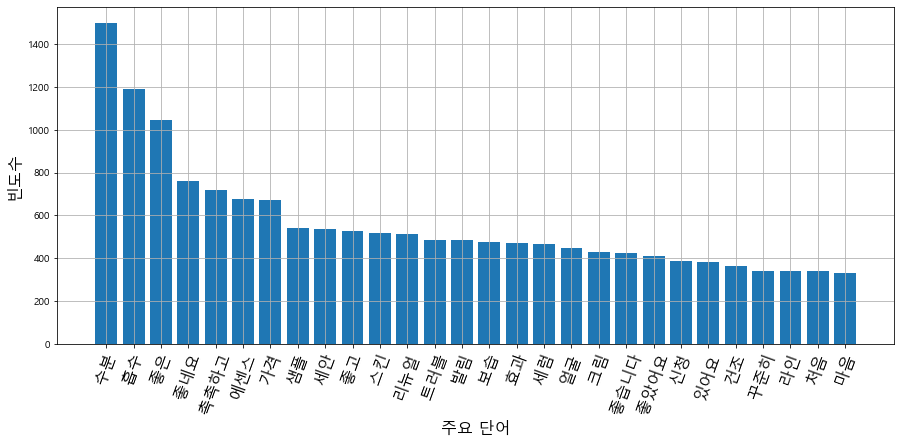

In [472]:
text1 = nltk.Text(stopword_galac, name="NMSC")
count = Counter(text1.vocab())
galac_info = dict()
for tags, counts in text1.vocab().most_common(30):
    if (len(str(tags)) > 1): 
        galac_info[tags] = counts
        print("%s:%d" %(tags, counts))

showGraph(galac_info)

In [473]:
def wordcloud(Text):
    data = Text.vocab().most_common(100)
    mpl.rcParams['font.size']=10               
    mpl.rcParams['savefig.dpi']=300             
    mpl.rcParams['figure.subplot.bottom']=.1 

    wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                          relative_scaling = 0.2,
                          background_color='white',
                          ).generate_from_frequencies(dict(data))
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

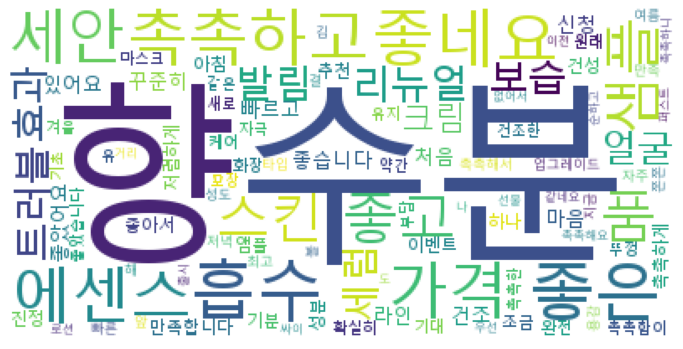

In [474]:
wordcloud(text1)

#### 히알루론산

In [272]:
del_hyalu = pd.read_csv("del_hyalu.csv", index_col=0)

In [273]:
del_hyalu_sort_by_point = del_hyalu.sort_values(by="point", ascending=False)

In [274]:
del_hyalu_sort_by_point.reset_index(drop=True, inplace=True)

In [277]:
filter_point_hyalu = del_hyalu_sort_by_point[ (del_hyalu_sort_by_point['point'] <= 3)].index
del_hyalu_sort_by_point.drop(filter_point_hyalu , inplace=True)

In [278]:
del_hyalu_sort_by_point.reset_index(drop=True, inplace=True)

In [280]:
del_hyalu_sort_by_point["noun"] = del_hyalu_sort_by_point["review"].apply(Okt.nouns)
del_hyalu_sort_by_point["tagging"] =  del_hyalu_sort_by_point["review"].apply(Okt.pos)

In [281]:
del_hyalu_sort_by_point = del_hyalu_sort_by_point.drop("date", axis=1)

In [282]:
del_hyalu_sort_by_point

,review,point,ingre,token_review,noun,tagging
0,촉촉하고 좋아용 ㅎㅎ,5,히알루론산,"['촉촉하고', '좋아용']",[],"[(촉촉하고, Adjective), (좋아용, Adjective), (ㅎㅎ, Kor..."
1,잘쓰도록 할께요 아직 사용전 이에요,5,히알루론산,"['잘쓰도록', '할께요', '아직', '사용', '전이', '에요']","[사용, 전]","[(잘쓰도록, Verb), (할께요, Verb), (아직, Adverb), (사용,..."
2,다른 스킨들보단 흡수가 잘되요,5,히알루론산,"['다른', '스킨', '들보', '흡수', '가', '잘', '되요']","[다른, 스킨, 흡수]","[(다른, Noun), (스킨, Noun), (들, Suffix), (보단, Jos..."
3,엄청 촉촉합니다\r\n스킨이랑 크림 다 같이 샀었는데 다른건 원래 쓰던 제품 써도 ...,5,히알루론산,"['엄청', '촉촉합니다', '\n', '스킨', '이랑', '크림', '다', '...","[스킨, 크림, 원래, 제품, 앰플, 정말, 쫀쫀, 것, 엄마, 개, 한번, 구입]","[(엄청, Adverb), (촉촉합니다, Adjective), (\r\n, Fore..."
4,오래쓰는중인데여전히좋아요,5,히알루론산,"['오래', '쓰는', '중', '인데', '여히', '좋아요']",[중],"[(오래, Adverb), (쓰는, Verb), (중, Noun), (인데, Jos..."
...,...,...,...,...,...,...
15435,아직 효과가 있는지 모르겠지만 배송이 빨라서 좋았습니다,4,히알루론산,"['아직', '효과', '가', '있는지', '모르겠지만', '배송', '이', '...","[효과, 배송, 빨]","[(아직, Adverb), (효과, Noun), (가, Josa), (있는지, Ad..."
15436,"배송이,,, 정말느리네요 12월1일에 시켰는데 주말빼도 5일걸렸어요. 이거보다 늦게...",4,히알루론산,"['배송', '이', '정말', '느리네요', '월일', '에', '시켰는데', '...","[배송, 정말, 주말, 거, 아이, 먼저, 별하나, 디렉터, 파이, 구매]","[(배송, Noun), (이, Josa), (,,,, Punctuation), (정..."
15437,앰플+스킨세트를 샀어요. 스킨은 쓰던게 있어서 지금 앰플만 사용중인데 쭉~ 흡수가 ...,4,히알루론산,"['앰', '플', '스킨', '세트', '를', '샀어요', '스킨', '은', ...","[앰플, 스킨, 세트, 스킨, 지금, 앰플, 사용, 쭉, 흡수, 여부, 앰플, 통]","[(앰플, Noun), (+, Punctuation), (스킨, Noun), (세트..."
15438,속건조한것이 조금 나아졌어요,4,히알루론산,"['속', '건조한것이', '조금', '나아졌어요']","[속, 조금]","[(속, Noun), (건조한것이, Adjective), (조금, Noun), (나..."


In [290]:
tokens_hyalu = [take2 for take1 in del_hyalu_sort_by_point["tagging"] for take2 in take1]
hyalu_filtering = [x for x, y in tokens_hyalu if y in ['Noun', 'Adjective']]

In [291]:
filtering = nltk.Text(hyalu_filtering, name="NMSC")
print(filtering.vocab().most_common()[:200])

[('좋아요', 3952), ('피부', 3225), ('사용', 2871), ('구매', 2195), ('제품', 1955), ('같아요', 1833), ('흡수', 1641), ('앰플', 1594), ('때', 1419), ('수분', 1411), ('것', 1360), ('느낌', 1327), ('거', 1187), ('촉촉하고', 1181), ('입니다', 1017), ('더', 1009), ('좋은', 973), ('트러블', 967), ('배송', 950), ('가격', 922), ('끈', 863), ('효과', 860), ('날', 822), ('추천', 749), ('보고', 700), ('좀', 667), ('다음', 644), ('보습', 640), ('크림', 635), ('건조', 633), ('진짜', 619), ('화장', 603), ('좋아서', 597), ('있어요', 586), ('좋네요', 575), ('쫀쫀', 554), ('정말', 552), ('토너', 549), ('감', 549), ('아주', 546), ('저', 541), ('얼굴', 521), ('건성', 508), ('처음', 506), ('한번', 502), ('계속', 502), ('또', 489), ('촉촉해요', 473), ('스킨', 470), ('생각', 469), ('전', 463), ('진정', 463), ('용량', 463), ('항상', 462), ('좋고', 458), ('좋습니다', 457), ('이', 455), ('구입', 429), ('꾸준히', 422), ('빠르고', 419), ('일', 416), ('주문', 390), ('만족합니다', 383), ('조금', 375), ('아침', 372), ('자극', 369), ('쓰기', 361), ('케어', 357), ('팩', 354), ('성분', 353), ('바로', 352), ('확실히', 347), ('제', 345), ('발라', 345), ('정도', 334), ('번'

In [475]:
stop_words = ['제품', '구매', '사용', '것', '때', '거', '더', '용량', '일', '진짜', '저', '배송', '통째', '좀', '또',
              '임', '이', '항상', '보고', '아주', '정말', '정도', '구입', '통', '생각', '용', '형', '주문', '제', '템',
              '번', '전', '때문', '바로', '후', '요즘', '다음', '벌써', '날', '일단', '늘', '걸', '상품', '다른', '쟁',
              '끈', '감', '금방', '안', '중', '사서', '요', '있습니다', "같습니다", '점', '속', '병', '버전', '있는데', '다시',
             '가장', '워낙', '쿠폰', '더욱', '편이', '이건', '제일', '그냥', '듭니', '시간', '매장', '년', '없어요', '이번',
             '이니스프리', '있어서', '없고', '한번', '용기', '매우', '같아서', '닉', '대비', '미리', '의사', '럼', '같아요',
             '입니다', "있는", '발라', '계속', '쓰기', '화장품', '맘', '듯', '기회', '수', '단', '역시', '예전', '평소',
             '적임','기존', '이번', '바로', '있어요', '좋아요', '피부', '앰플', "느낌"]

stopword_hyalu = [each_word for each_word in hyalu_filtering  if each_word not in stop_words]
text2 = nltk.Text(stopword_hyalu, name="NMSC")

In [476]:
print(text2.vocab().most_common()[:100])

[('흡수', 1641), ('수분', 1411), ('촉촉하고', 1181), ('좋은', 973), ('트러블', 967), ('가격', 922), ('효과', 860), ('추천', 749), ('보습', 640), ('크림', 635), ('건조', 633), ('화장', 603), ('좋아서', 597), ('좋네요', 575), ('쫀쫀', 554), ('토너', 549), ('얼굴', 521), ('건성', 508), ('처음', 506), ('촉촉해요', 473), ('스킨', 470), ('진정', 463), ('좋고', 458), ('좋습니다', 457), ('꾸준히', 422), ('빠르고', 419), ('만족합니다', 383), ('조금', 375), ('아침', 372), ('자극', 369), ('케어', 357), ('팩', 354), ('성분', 353), ('확실히', 347), ('순하고', 322), ('하나', 318), ('히알루론산', 295), ('겨울', 286), ('양', 281), ('완전', 272), ('샘플', 267), ('개', 264), ('좋다고', 262), ('약간', 258), ('저녁', 255), ('해', 255), ('에센스', 251), ('무난', 251), ('발림', 246), ('웰라쥬', 241), ('촉촉해서', 233), ('저렴하게', 230), ('부지', 229), ('같은', 222), ('만족', 221), ('파이', 220), ('최고', 217), ('디렉터', 215), ('마스크', 212), ('좋', 211), ('좋았어요', 193), ('행사', 193), ('촉촉하니', 192), ('중요한', 192), ('촉촉한', 189), ('후기', 186), ('꼭', 185), ('건조한', 182), ('라인', 182), ('여름', 179), ('기대', 176), ('할인', 175), ('선물', 171), ('지금', 169), ('자주'

흡수:1641
수분:1411
촉촉하고:1181
좋은:973
트러블:967
가격:922
효과:860
추천:749
보습:640
크림:635
건조:633
화장:603
좋아서:597
좋네요:575
쫀쫀:554
토너:549
얼굴:521
건성:508
처음:506
촉촉해요:473
스킨:470
진정:463
좋고:458
좋습니다:457
꾸준히:422
빠르고:419
만족합니다:383
조금:375
아침:372
자극:369


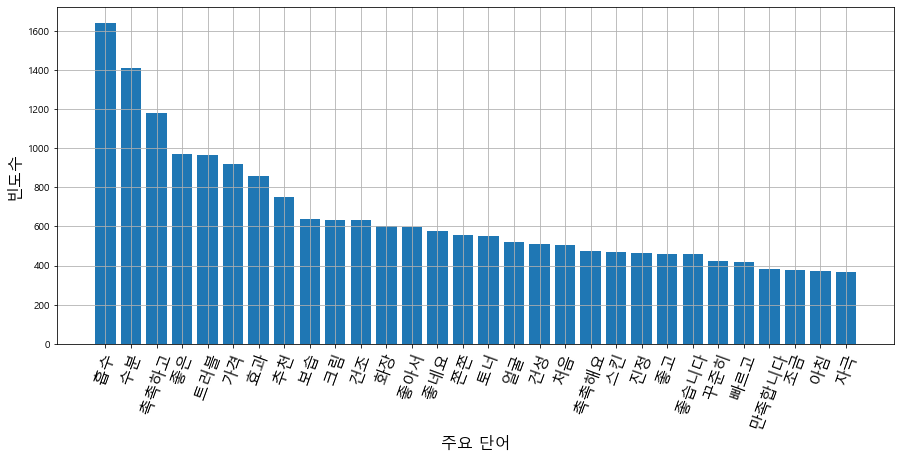

In [477]:
text2 = nltk.Text(stopword_hyalu, name="NMSC")
count2 = Counter(text2.vocab())
hyal_info = dict()
for tags, counts in text2.vocab().most_common(30):
    if (len(str(tags)) > 1):
        hyal_info[tags] = counts
        print("%s:%d" %(tags, counts))

showGraph(hyal_info)

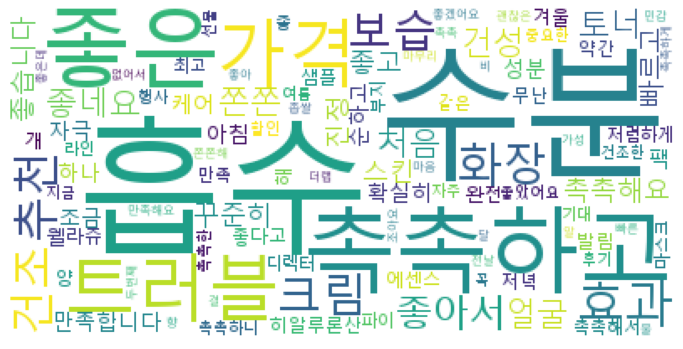

In [478]:
wordcloud(text2)